# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [64]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.()
mice_count = df["Mouse ID"].unique().size
mice_count

249

In [37]:
df.duplicated(keep='last')

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.


248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen = df.set_index(["Drug Regimen"])

mean_tumor_volume = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_volume = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('var')
std_tumor_volume = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('std')
sem_tumor_volume = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg('sem')


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [55]:
# Assemble the resulting series into a single summary DataFrame.
tumor_statistics_df = pd.DataFrame({"Mean Tumor Volume" : mean_tumor_volume,
                                   "Median Tumor Volume" : median_tumor_volume,
                                   "Tumor Volume Variance": var_tumor_volume,
                                   "Tumor Volume Std. Dev.": std_tumor_volume,
                                   "Tumor Volume Std. Err.": sem_tumor_volume})
tumor_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumor_statistics_agg_df = df.agg({"mean" : "Drug Regimen"})


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [79]:
drug_regimen_two = df.set_index(["Drug Regimen"])
time = df.groupby("Drug Regimen")["Timepoint"].count()
dr_df = pd.DataFrame({"Timepoint" : time})
dr_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


Text(0, 0.5, 'Number of Mice Tested')

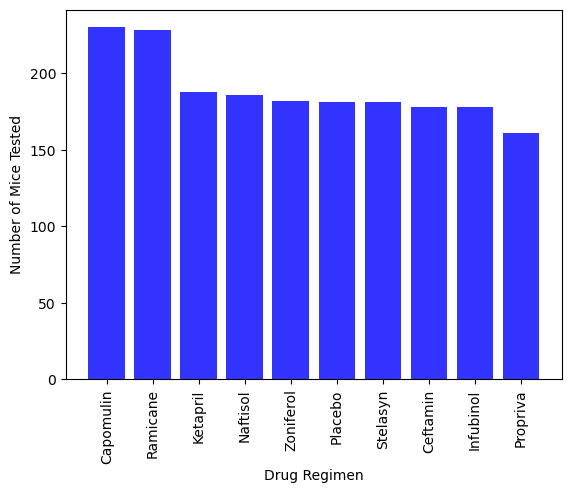

In [84]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_bar = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", 
                   "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
timepoints_bar = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]

plt.bar(drug_regimen_bar, timepoints_bar, color='b', alpha=0.8, align="center")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male = df[(df["Sex"] == "Male")]
male.count()

Mouse ID              958
Drug Regimen          958
Sex                   958
Age_months            958
Weight (g)            958
Timepoint             958
Tumor Volume (mm3)    958
Metastatic Sites      958
dtype: int64

In [101]:
female = df[(df["Sex"] == "Female")]
female.count()

Mouse ID              935
Drug Regimen          935
Sex                   935
Age_months            935
Weight (g)            935
Timepoint             935
Tumor Volume (mm3)    935
Metastatic Sites      935
dtype: int64

<AxesSubplot:ylabel='Count'>

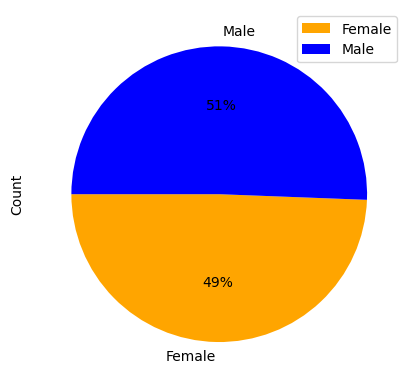

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_df = pd.DataFrame({"Sex" : ["Male", "Female"], "Count" : [958, 935]})
colors = ["orange", "blue"]

pie_df.groupby(["Sex"]).sum().plot(kind='pie', y='Count', 
  autopct='%1.0f%%', colors=colors, startangle=180)


Text(0, 0.5, 'Sex')

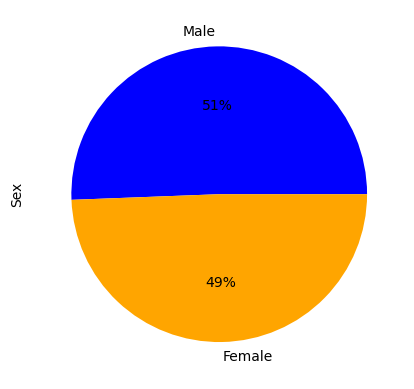

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
count = [958, 935]
colors = ["blue", "orange"]

plt.pie(count, labels=labels, colors=colors,
        autopct="%1.0f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [111]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#high_performing_schools = per_school_summary.sort_values("% Overall Passing", ascending = False)

In [237]:

new_df = df[["Mouse ID", "Drug Regimen", "Timepoint"]]
new_df = new_df.set_index(["Mouse ID"])


newer_df = new_df.loc[(new_df["Drug Regimen"] == "Capomulin") | (new_df["Drug Regimen"] == "Ramicane") | 
                      (new_df["Drug Regimen"] == "Infubinol") | (new_df["Drug Regimen"] == "Ceftamine"), :]
newer_df

last_timepoint = newer_df.sort_values("Timepoint", ascending = False)
last_timepoint.head()

,Drug Regimen,Timepoint
Mouse ID,,
z581,Infubinol,45
a444,Ramicane,45
m957,Capomulin,45
r944,Capomulin,45
e662,Ramicane,45


In [13]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


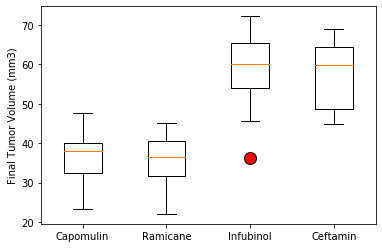

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [242]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capomulin = df[["Drug Regimen", "Timepoint", "Mouse ID", "Tumor Volume (mm3)"]]
                      
capomulin_df = capomulin.loc[(capomulin["Drug Regimen"] == "Capomulin") & (capomulin["Mouse ID"] == "l509"), :]


capomulin_df

,Drug Regimen,Timepoint,Mouse ID,Tumor Volume (mm3)
371,Capomulin,0,l509,45.000000
372,Capomulin,5,l509,45.851193
373,Capomulin,10,l509,46.759074
374,Capomulin,15,l509,47.488599
375,Capomulin,20,l509,48.070452
376,Capomulin,25,l509,44.006257
377,Capomulin,30,l509,44.708055
378,Capomulin,35,l509,40.207288
379,Capomulin,40,l509,40.770813
380,Capomulin,45,l509,41.483008


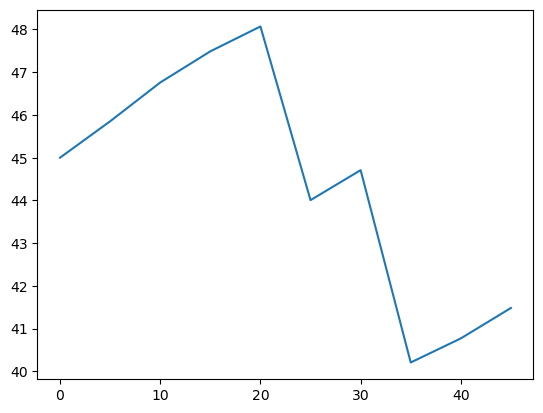

In [233]:
tumor_volumemm3 = capomulin_df["Tumor Volume (mm3)"]
y_axis = tumor_volumemm3

timepoint_capomulin = capomulin_df["Timepoint"]
x_axis = timepoint_capomulin

plt.plot(x_axis, y_axis)

In [256]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


#avg_tumor_weight_df = df[["Mouse ID", "Drug Regimen", "Timepoint"]]

#avg_tumor_weight = df[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)", "Drug Regimen"]]

capomulin_drug = df[(df["Drug Regimen"] == "Capomulin")]


average_tumor_vol = df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
average_mouse_weight = df.groupby(["Mouse ID"])["Weight (g)"].mean()

#avg_tumor_weight_df = avg_tumor_weight_df.loc[(avg_tumor_weight["Drug Regimen"] == "Capomulin"), :]

avg_tumor_weight_df = pd.DataFrame({"Avg Tumor Volume" : average_tumor_vol, 
                                    "Avg Mouse Weight": average_mouse_weight,
                                   "Drug Regimen": capomulin_drug})

avg_tumor_weight_df = avg_tumor_weight_df.set_index(["Mouse ID"])



#avg_tumor_weight_df = avg_tumor_weight_df.loc[(capomulin["Drug Regimen"] == "Capomulin")]

avg_tumor_weight_df.head()

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

KeyError: 'Avg Mouse Weight'

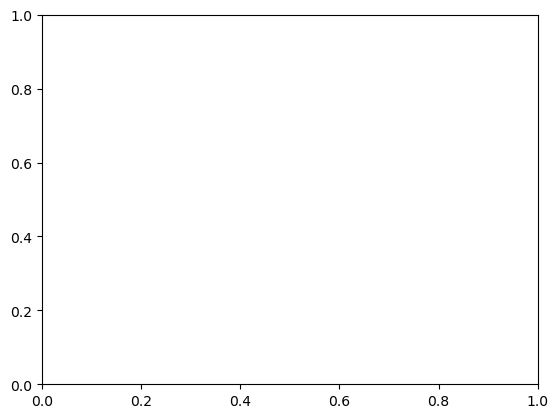

In [246]:
avg_tumor_weight_df.plot(kind='scatter', x = 'Avg Mouse Weight', y = 'Avg Tumor Volume')
plt.show()

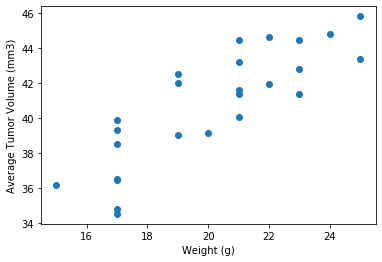

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


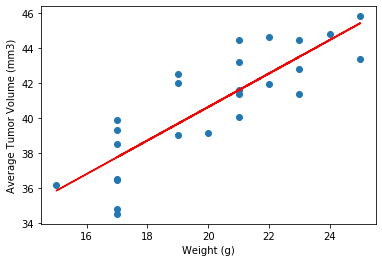

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

